#### Name : Amjad Ali 
#### CMS: 023-19-0131
#### Machine Learning Assignment 05

# Assignment 04 (Short assignment: processing images with CNN)

*Import libraries*

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Define a CNN with four Convolution Layers (16, 32, 64, 128) with kernal size 3.  (10 points)

In [ ]:
classifier = Sequential()
classifier.add(Conv2D(16, (3, 3), activation="relu", input_shape=(250, 250, 3)))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(64, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(128, (3, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
#Apply appropriate activation function at the last layer (10 points)
classifier.add(Dense(activation = 'sigmoid', units = 1))

In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 248, 248, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 124, 124, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 122, 122, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 59, 59, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 29, 29, 64)      

### Compile the model (5 points)

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Data preprocessing

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Datasets/Chest_X-ray Dataset/train'
validation_dir = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Datasets/Chest_X-ray Dataset/val'
test_dir = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Datasets/Chest_X-ray Dataset/test'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(250, 250),
        batch_size=132,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(250, 250),
        batch_size=8,
        class_mode='binary')

Found 606 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (132, 250, 250, 3)
labels batch shape: (132,)


## Train it on 50 epochs using 300 images from each of the two classes (total 600), report training and validation accuracy (5 points)

In [ ]:
history = classifier.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.n//train_generator.batch_size,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=validation_generator.n//validation_generator.batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
4/4 [==============================] - 39s 9s/step - loss: 0.4828 - accuracy: 0.7500 - val_loss: 0.5526 - val_accuracy: 0.7500
Epoch 2/50
4/4 [==============================] - 36s 8s/step - loss: 0.3457 - accuracy: 0.8755 - val_loss: 0.6379 - val_accuracy: 0.5000
Epoch 3/50
4/4 [==============================] - 38s 10s/step - loss: 0.3076 - accuracy: 0.8987 - val_loss: 0.5837 - val_accuracy: 0.7500
Epoch 4/50
4/4 [==============================] - 38s 9s/step - loss: 0.2216 - accuracy: 0.9413 - val_loss: 0.5678 - val_accuracy: 0.6875
Epoch 5/50
4/4 [==============================] - 35s 8s/step - loss: 0.1856 - accuracy: 0.9346 - val_loss: 0.5082 - val_accuracy: 0.7500
Epoch 6/50
4/4 [==============================] - 35s 8s/step - loss: 0.1570 - accuracy: 0.9473 - val_loss: 0.4676 - val_accuracy: 0.7500
Epoch 7/50
4/4 [==============================] - 35s 8s/step - loss: 0.1120 - accuracy: 0.9599 - val_loss: 0.3774 - val_accuracy: 0.8125
Epoch 8/50
4/4 [=================

## Plot accuracy graph for training and validation (5 points)

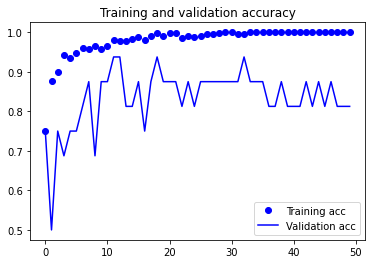

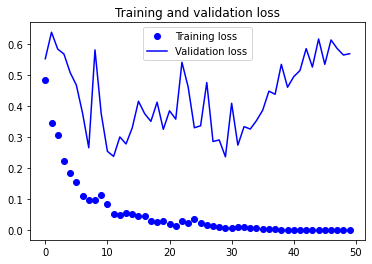

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## If model overfits, retrain on the revised number of epochs to overcome overfitting (10 points)

In [ ]:
history = classifier.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.n//train_generator.batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.n//validation_generator.batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
4/4 [==============================] - 39s 9s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.5316 - val_accuracy: 0.8125
Epoch 2/10
4/4 [==============================] - 38s 9s/step - loss: 8.4858e-04 - accuracy: 1.0000 - val_loss: 0.6927 - val_accuracy: 0.8125
Epoch 3/10
4/4 [==============================] - 35s 9s/step - loss: 9.3075e-04 - accuracy: 1.0000 - val_loss: 0.5192 - val_accuracy: 0.8125
Epoch 4/10
4/4 [==============================] - 35s 8s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.7073 - val_accuracy: 0.8125
Epoch 5/10
4/4 [==============================] - 37s 9s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6268 - val_accuracy: 0.8125
Epoch 6/10
4/4 [==============================] - 38s 9s/step - loss: 9.2024e-04 - accuracy: 1.0000 - val_loss: 0.5611 - val_accuracy: 0.8125
Epoch 7/10
4/4 [==============================] - 35s 8s/step - loss: 9.5130e-04 - accuracy: 1.0000 - val_loss: 0.7536 - val_accuracy: 0.8125
Epoch 8/10
4/4 [==

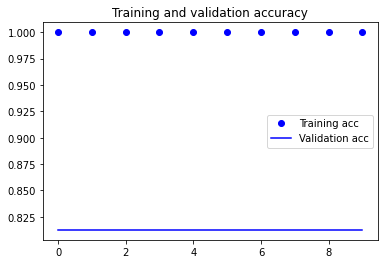

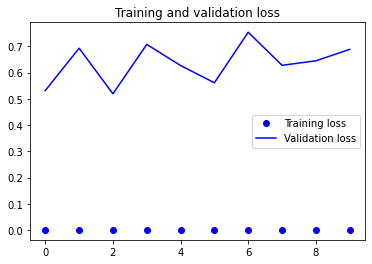

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(250, 250),
    batch_size=8,
    class_mode='binary')

Found 624 images belonging to 2 classes.


## Evaluate model on the test dataset and report test accuracy (5 points)

In [ ]:
result = classifier.evaluate(test_generator, return_dict=True)
print(result)

78/78 [==============================] - 68s 877ms/step - loss: 0.9477 - accuracy: 0.8333
{'loss': 0.947682797908783, 'accuracy': 0.8333333134651184}
